In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)
print()

In [100]:
# Group students from the same/similar specialisations and find out the average Romanian grades.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] > -1)]
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] > -1)]

def combine_specialisations(results, substring, specialisation_name):
    criteria = results[results['specialization'].str.contains(substring)]
    criteria_size = criteria['size'].sum()
    criteria_mean = (criteria['mean'] * criteria['size']).sum() / criteria_size
    new_results = results.drop(criteria.index).reset_index(drop=True).copy()
    new_results.loc[len(new_results)] = [specialisation_name, criteria_size, criteria_mean]
    return new_results

def specialisation_grouping(results):
    spec_results = results.groupby(['specialization']).agg({'specialization': ['size'], 'romanian_written_final': ['mean']})
    spec_results.columns = spec_results.columns.get_level_values(1)
    spec_results = spec_results.reset_index()
    
    # combine specialisations to have less categories
    spec_results = combine_specialisations(spec_results, 'TEHNICIAN|ORGANIZATOR|COAFOR', 'TEHNICIAN')
    spec_results = combine_specialisations(spec_results, 'TEOLOGIE|RELIGIOS', 'TEOLOGIE')
    spec_results = combine_specialisations(spec_results, 'EDUCATOR|INVATATOR|INSTRUCTOR', 'EDUCATOR')
    spec_results = combine_specialisations(spec_results, 'MUZICA|CONSERVARE|COREGRAFIE|CULTURAL|ARTA|ARTE', 'ARTA SI CULTURA')
    
    return spec_results

spec_ro_results = specialisation_grouping(romanian_only_results)
display(spec_ro_results.sort_values('mean'))

spec_min_results = specialisation_grouping(romanian_plus_results)
display(spec_min_results.sort_values('mean'))

,specialization,size,mean
1,LICEU CU PROGRAM SPORTIV,4269,5.707320
5,TEHNICIAN,40724,5.970688
6,TEOLOGIE,1391,6.998814
8,ARTA SI CULTURA,3465,7.078961
4,STIINTE SOCIALE,10761,7.400697
0,FILOLOGIE,19624,7.531637
3,STIINTE ALE NATURII,17668,7.646165
2,MATEMATICA-INFORMATICA,23532,8.108766
7,EDUCATOR,2112,8.111174


,specialization,size,mean
5,TEHNICIAN,1489,3.996716
1,LICEU CU PROGRAM SPORTIV,85,4.062941
8,ARTA SI CULTURA,290,4.571552
6,TEOLOGIE,467,5.105246
4,STIINTE SOCIALE,471,5.950849
7,EDUCATOR,192,6.062500
0,FILOLOGIE,923,6.127952
3,STIINTE ALE NATURII,1450,6.838793
2,MATEMATICA-INFORMATICA,1070,6.943692


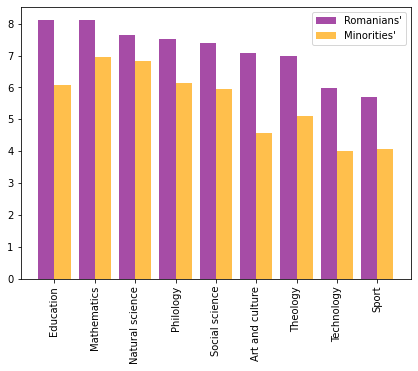

In [116]:
# Plot average Romanian grades.

specialisation_labels = ['Education', 'Mathematics', 'Natural science', 'Philology', 'Social science', 'Art and culture', 'Theology', 'Technology', 'Sport']
specialisation_labels_ro = ['EDUCATOR', 'MATEMATICA-INFORMATICA', 'STIINTE ALE NATURII', 'FILOLOGIE', 'STIINTE SOCIALE', 'ARTA SI CULTURA', 'TEOLOGIE', 'TEHNICIAN', 'LICEU CU PROGRAM SPORTIV']

spec_ro = spec_ro_results.set_index('specialization')
means_ro = spec_ro.loc[specialisation_labels_ro]['mean']
spec_minority = spec_min_results.set_index('specialization')
means_minority = spec_minority.loc[specialisation_labels_ro]['mean']

label_loc = np.arange(len(specialisation_labels))
bar_width = 0.4
fig, ax = plt.subplots(figsize=(7, 5))
rects_ro = ax.bar(label_loc - bar_width/2, means_ro, bar_width, label="Romanians'", color='purple', alpha=0.7)
rects_minority = ax.bar(label_loc + bar_width/2, means_minority, bar_width, label="Minorities'", color='orange', alpha=0.7)

ax.set_xticks(label_loc)
ax.set_xticklabels(specialisation_labels)
ax.legend()

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
